<a href="https://colab.research.google.com/github/bishalakajiren/30Days-of-GCP/blob/master/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('drive/MyDrive/table1.csv' )
df.head()

,Deadline?,Is there a party?,Lazy?,Activity
0,Urgent,Yes,Yes,Party
1,Urgent,No,Yes,Study
2,None,Yes,Yes,Party
3,None,Yes,No,Party
4,None,No,Yes,Pub


In [ ]:
y= df['Activity']
X= df.drop(['Activity'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
y_train.value_counts(normalize=True)

Party    0.571429
Pub      0.142857
TV       0.142857
Study    0.142857
Name: Activity, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Study    0.666667
Party    0.333333
Name: Activity, dtype: float64

In [ ]:
X_train.shape, y_train.shape

((7, 3), (7,))

In [ ]:
X_test.shape, y_test.shape

((3, 3), (3,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Deadline?          10 non-null     object
 1   Is there a party?  10 non-null     object
 2   Lazy?              10 non-null     object
 3   Activity           10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [124]:

!pip install category_encoders


     |████████████████████████████████| 82 kB 315 kB/s 


In [125]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [148]:
encoder = ce.OrdinalEncoder(cols=['Deadline?','Is there a party?','Lazy?'])

In [149]:
X_train = encoder.fit_transform(X_train)

In [150]:
X_test = encoder.transform(X_test)

In [151]:
X_train.head()

,Deadline?,Is there a party?,Lazy?
4,1,1,1
0,2,2,1
3,1,2,2
1,2,1,1
7,1,1,1


In [152]:
clf = DecisionTreeClassifier()

In [154]:
clf =clf.fit(X_train,y_train)

In [155]:
y_pred = clf.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6666666666666666


In [158]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [159]:
y_pred_en = clf_en.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6667


In [161]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Pub', 'Party', 'Party', 'Study', 'Pub', 'Party', 'Party'],
      dtype=object)

In [162]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8571


In [163]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8571
Test set score: 0.6667


[Text(401.76000000000005, 362.4, 'X[1] <= 1.5\nentropy = 1.664\nsamples = 7\nvalue = [4, 1, 1, 1]'),
 Text(267.84000000000003, 217.44, 'X[0] <= 1.5\nentropy = 1.585\nsamples = 3\nvalue = [0, 1, 1, 1]'),
 Text(133.92000000000002, 72.47999999999996, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 0, 1]'),
 Text(401.76000000000005, 72.47999999999996, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(535.6800000000001, 217.44, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]')]

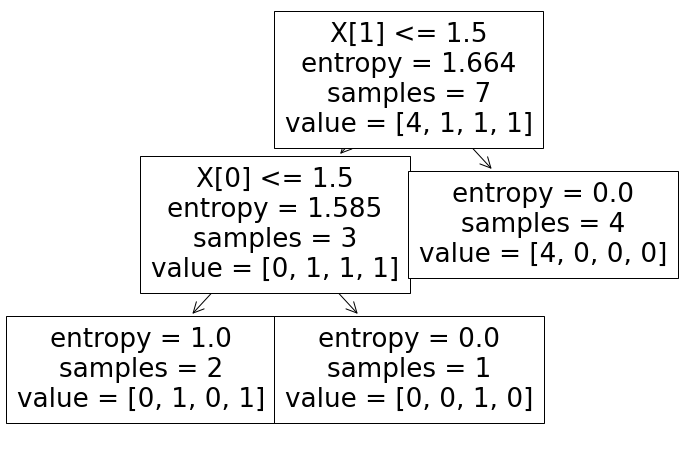

In [164]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 